In [1]:
%matplotlib inline
import pyfolio as pf

In [2]:
from datetime import datetime
import pytz
from pandas import Timestamp

In [3]:
from zipline import run_algorithm
from zipline.api import order_target, record, symbol

In [4]:
from zipline.algorithm import TradingAlgorithm

In [5]:
!pip install pandas==0.19

In [6]:
#!zipline ingest
!zipline bundles

quandl 2017-09-26 16:24:43.827842
quandl 2017-09-26 16:23:28.934127
quantopian-quandl 2017-09-26 16:22:42.927467
quantopian-quandl 2017-09-26 15:47:48.566802
quantopian-quandl 2017-09-26 15:37:43.163743
quantopian-quandl 2017-09-26 15:37:02.121343


In [7]:
def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 20:
        return
    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=10, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=20, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 20)
    elif short_mavg < long_mavg:
        order_target(context.asset, -20)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)

In [8]:
tz = pytz.timezone("US/Mountain")
start = datetime(2016, 10, 1, tzinfo=tz)
end = datetime(2017, 9, 25, tzinfo=tz)

results = run_algorithm(
    start,
    end,
    capital_base=10000,
    initialize=initialize,
    handle_data=handle_data,
)


/usr/local/lib/python3.4/site-packages/empyrical/stats.py:522: RuntimeWarning: invalid value encountered in double_scalars
  sortino = mu / dsr


In [9]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

Entire data start date: 2016-10-03
Entire data end date: 2017-09-22
Backtest months: 11


,Backtest
Annual return,7.2%
Cumulative returns,7.0%
Annual volatility,4.6%
Sharpe ratio,1.55
Calmar ratio,2.43
Stability,0.67
Max drawdown,-3.0%
Omega ratio,1.35
Sortino ratio,2.39
Skew,0.24


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,2.96,2017-05-12,2017-07-31,2017-09-22,96
1,1.59,2017-04-04,2017-05-04,2017-05-12,29
2,1.24,2016-11-14,2016-12-05,2016-12-15,24
3,0.44,2016-11-04,2016-11-08,2016-11-10,5
4,0.42,2016-10-28,2016-11-01,2016-11-04,6


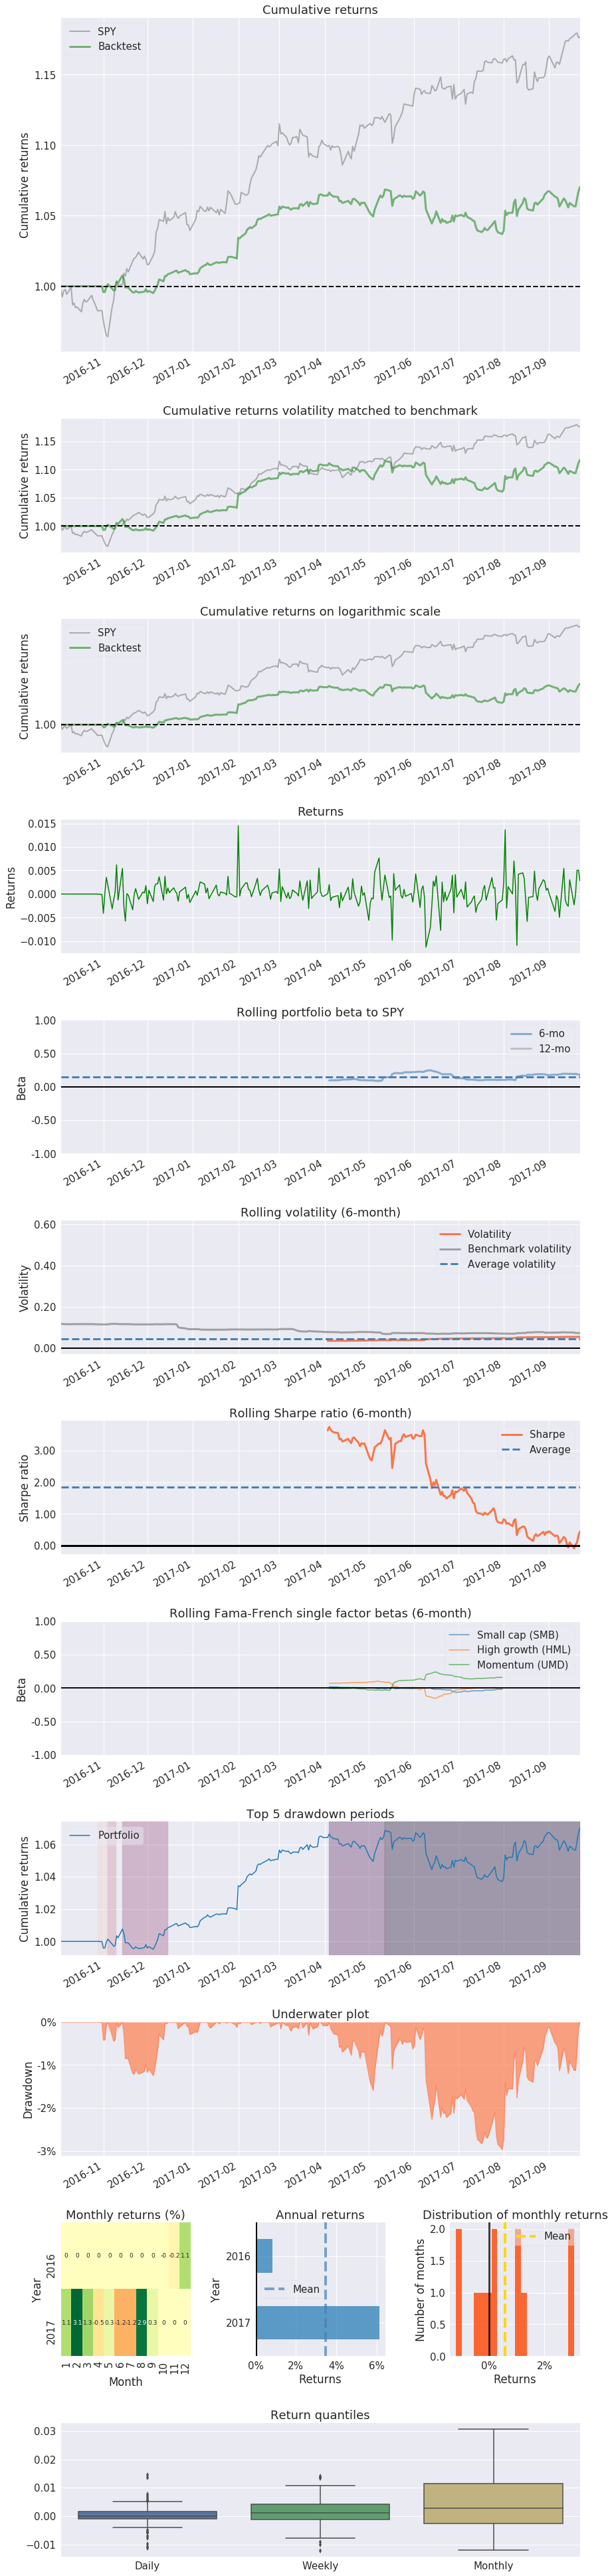

Stress Events,mean,min,max
New Normal,0.03%,-1.13%,1.45%


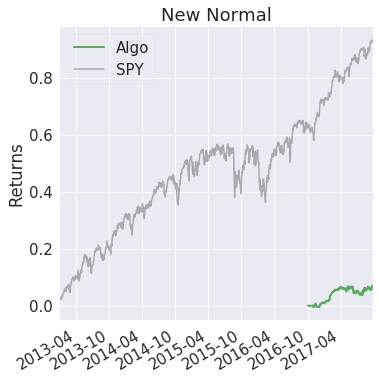

Top 10 long positions of all time,max
AAPL,30.74%


Top 10 short positions of all time,max
AAPL,-30.04%


Top 10 positions of all time,max
AAPL,30.74%


All positions ever held,max
AAPL,30.74%


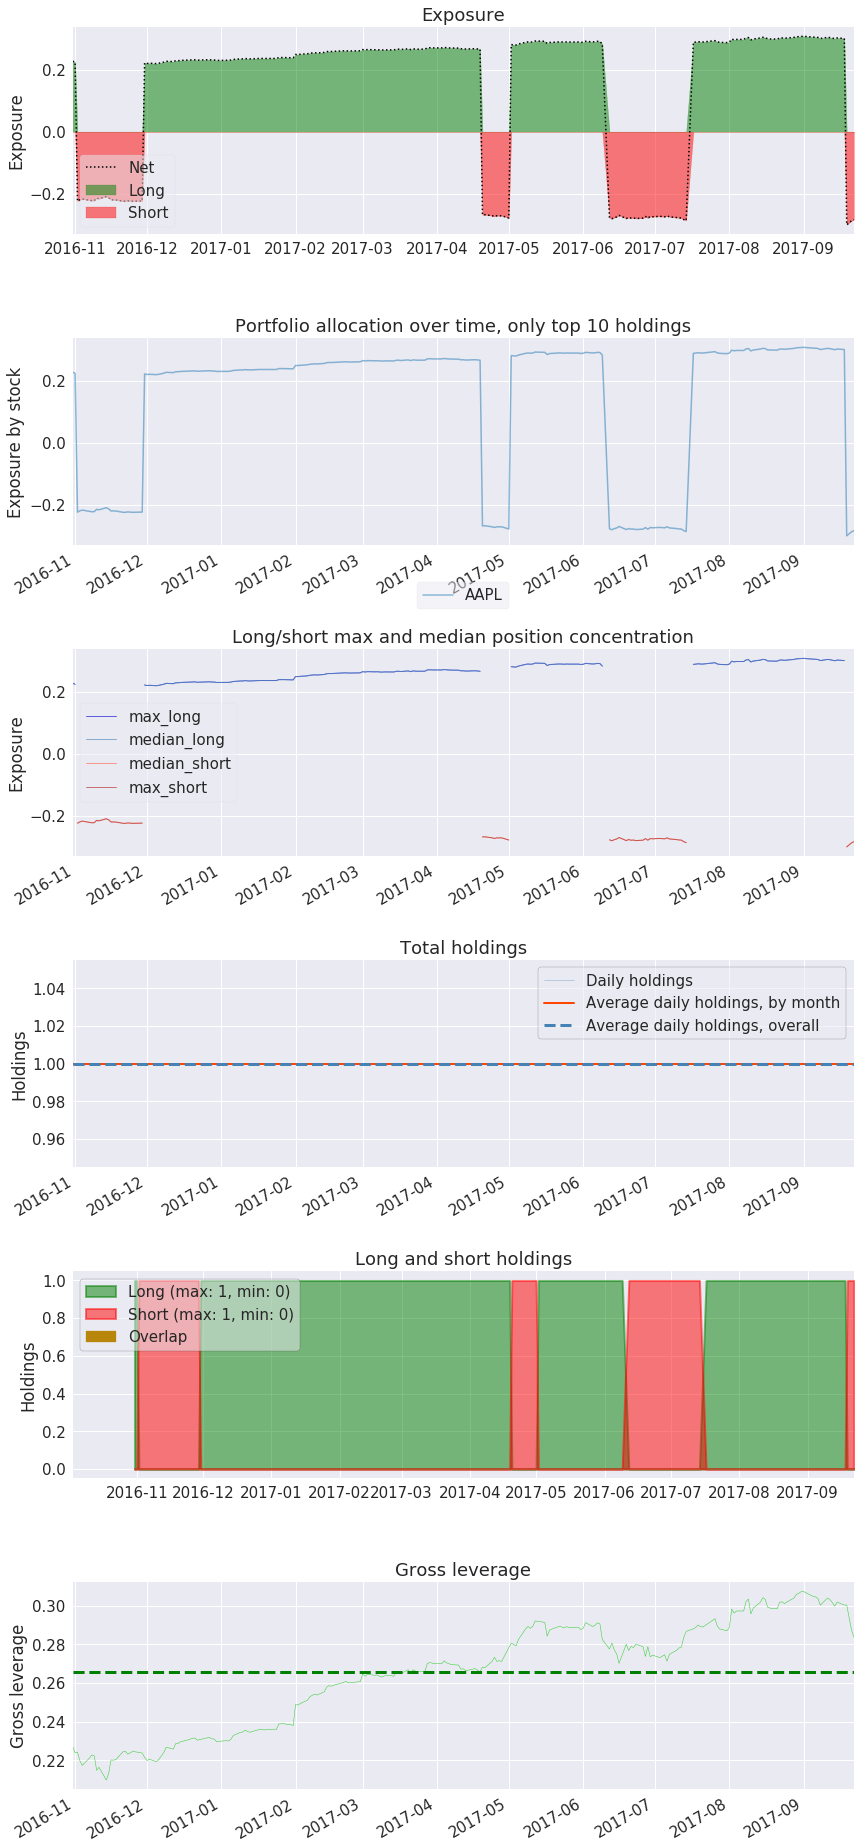

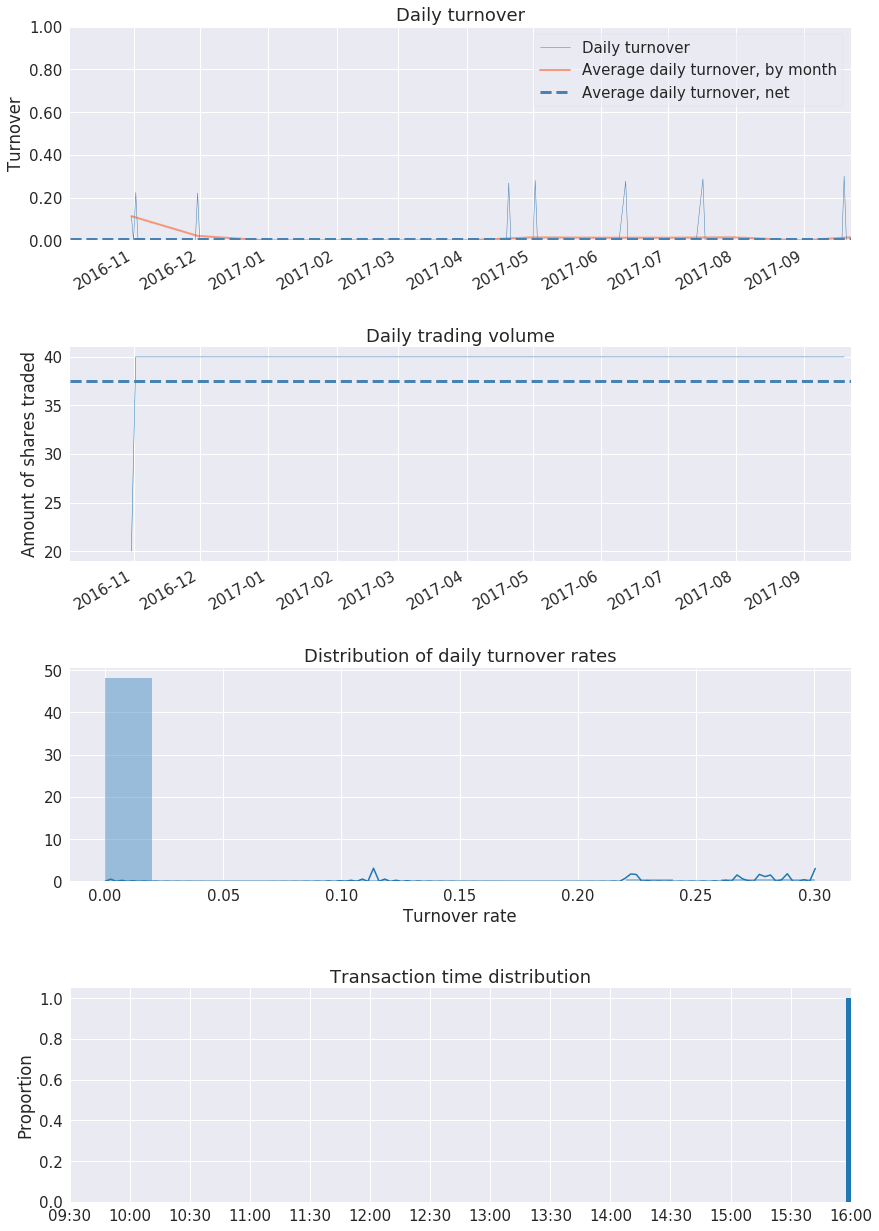

In [10]:
pf.create_full_tear_sheet(returns, positions, transactions)